<a href="https://colab.research.google.com/github/prav-kotte1/DM-Lab/blob/main/WineQuality_MissingValues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

In [5]:
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

df = pd.read_csv(f"{path}/WineQT.csv")
df.head()

100%|██████████| 21.5k/21.5k [00:00<00:00, 23.8MB/s]

Extracting files...


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [7]:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)
df.isnull().sum()

/tmp/ipython-input-153740905.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [8]:
from scipy.stats import zscore
z_scores = np.abs(zscore(df.select_dtypes(include=['float64', 'int64'])))
df_no_outliers = df[(z_scores < 3).all(axis=1)]
print("Original shape:", df.shape)
print("After outlier removal:", df_no_outliers.shape)

Original shape: (1143, 13)
After outlier removal: (1041, 13)


In [10]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = df_no_outliers.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded = pd.DataFrame(
        encoder.fit_transform(df_no_outliers[categorical_cols]),
        columns=encoder.get_feature_names_out(categorical_cols)
    )
    df_encoded = pd.concat(
        [df_no_outliers.drop(columns=categorical_cols).reset_index(drop=True),
         encoded.reset_index(drop=True)],
        axis=1
    )
else:
    df_encoded = df_no_outliers.copy()

df_encoded.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [11]:
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)
scaled_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,0.282353,0.610526,0.000000,0.130841,0.202128,0.222222,0.202899,0.586077,0.700000,0.2875,0.176471,0.25,0.000000
1,0.329412,0.800000,0.000000,0.261682,0.319149,0.533333,0.442029,0.492004,0.355556,0.4375,0.254902,0.25,0.000626
2,0.329412,0.673684,0.050633,0.205607,0.287234,0.311111,0.347826,0.510818,0.422222,0.4000,0.254902,0.25,0.001252
3,0.729412,0.168421,0.708861,0.130841,0.196809,0.355556,0.391304,0.604892,0.311111,0.3125,0.254902,0.50,0.001879
4,0.282353,0.610526,0.000000,0.130841,0.202128,0.222222,0.202899,0.586077,0.700000,0.2875,0.176471,0.25,0.002505


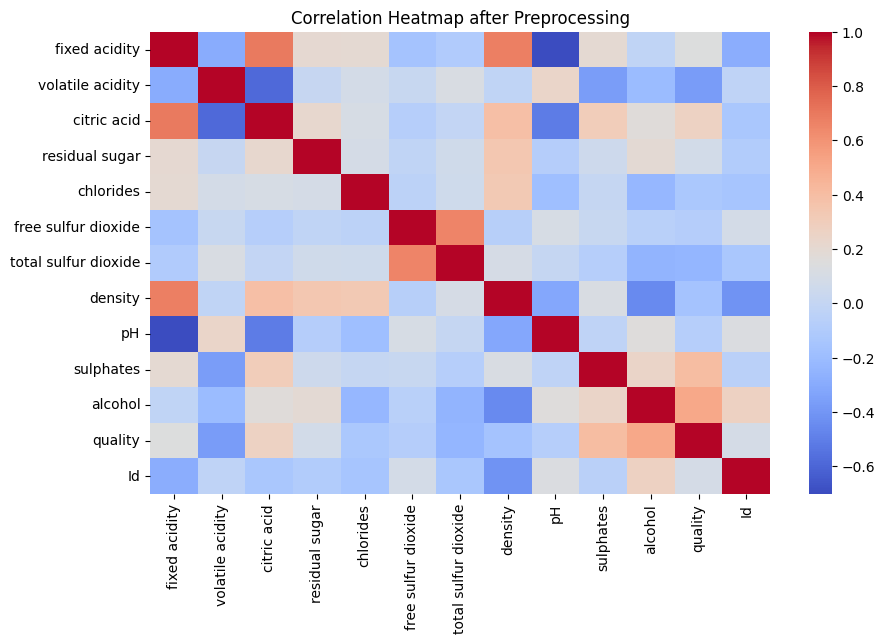

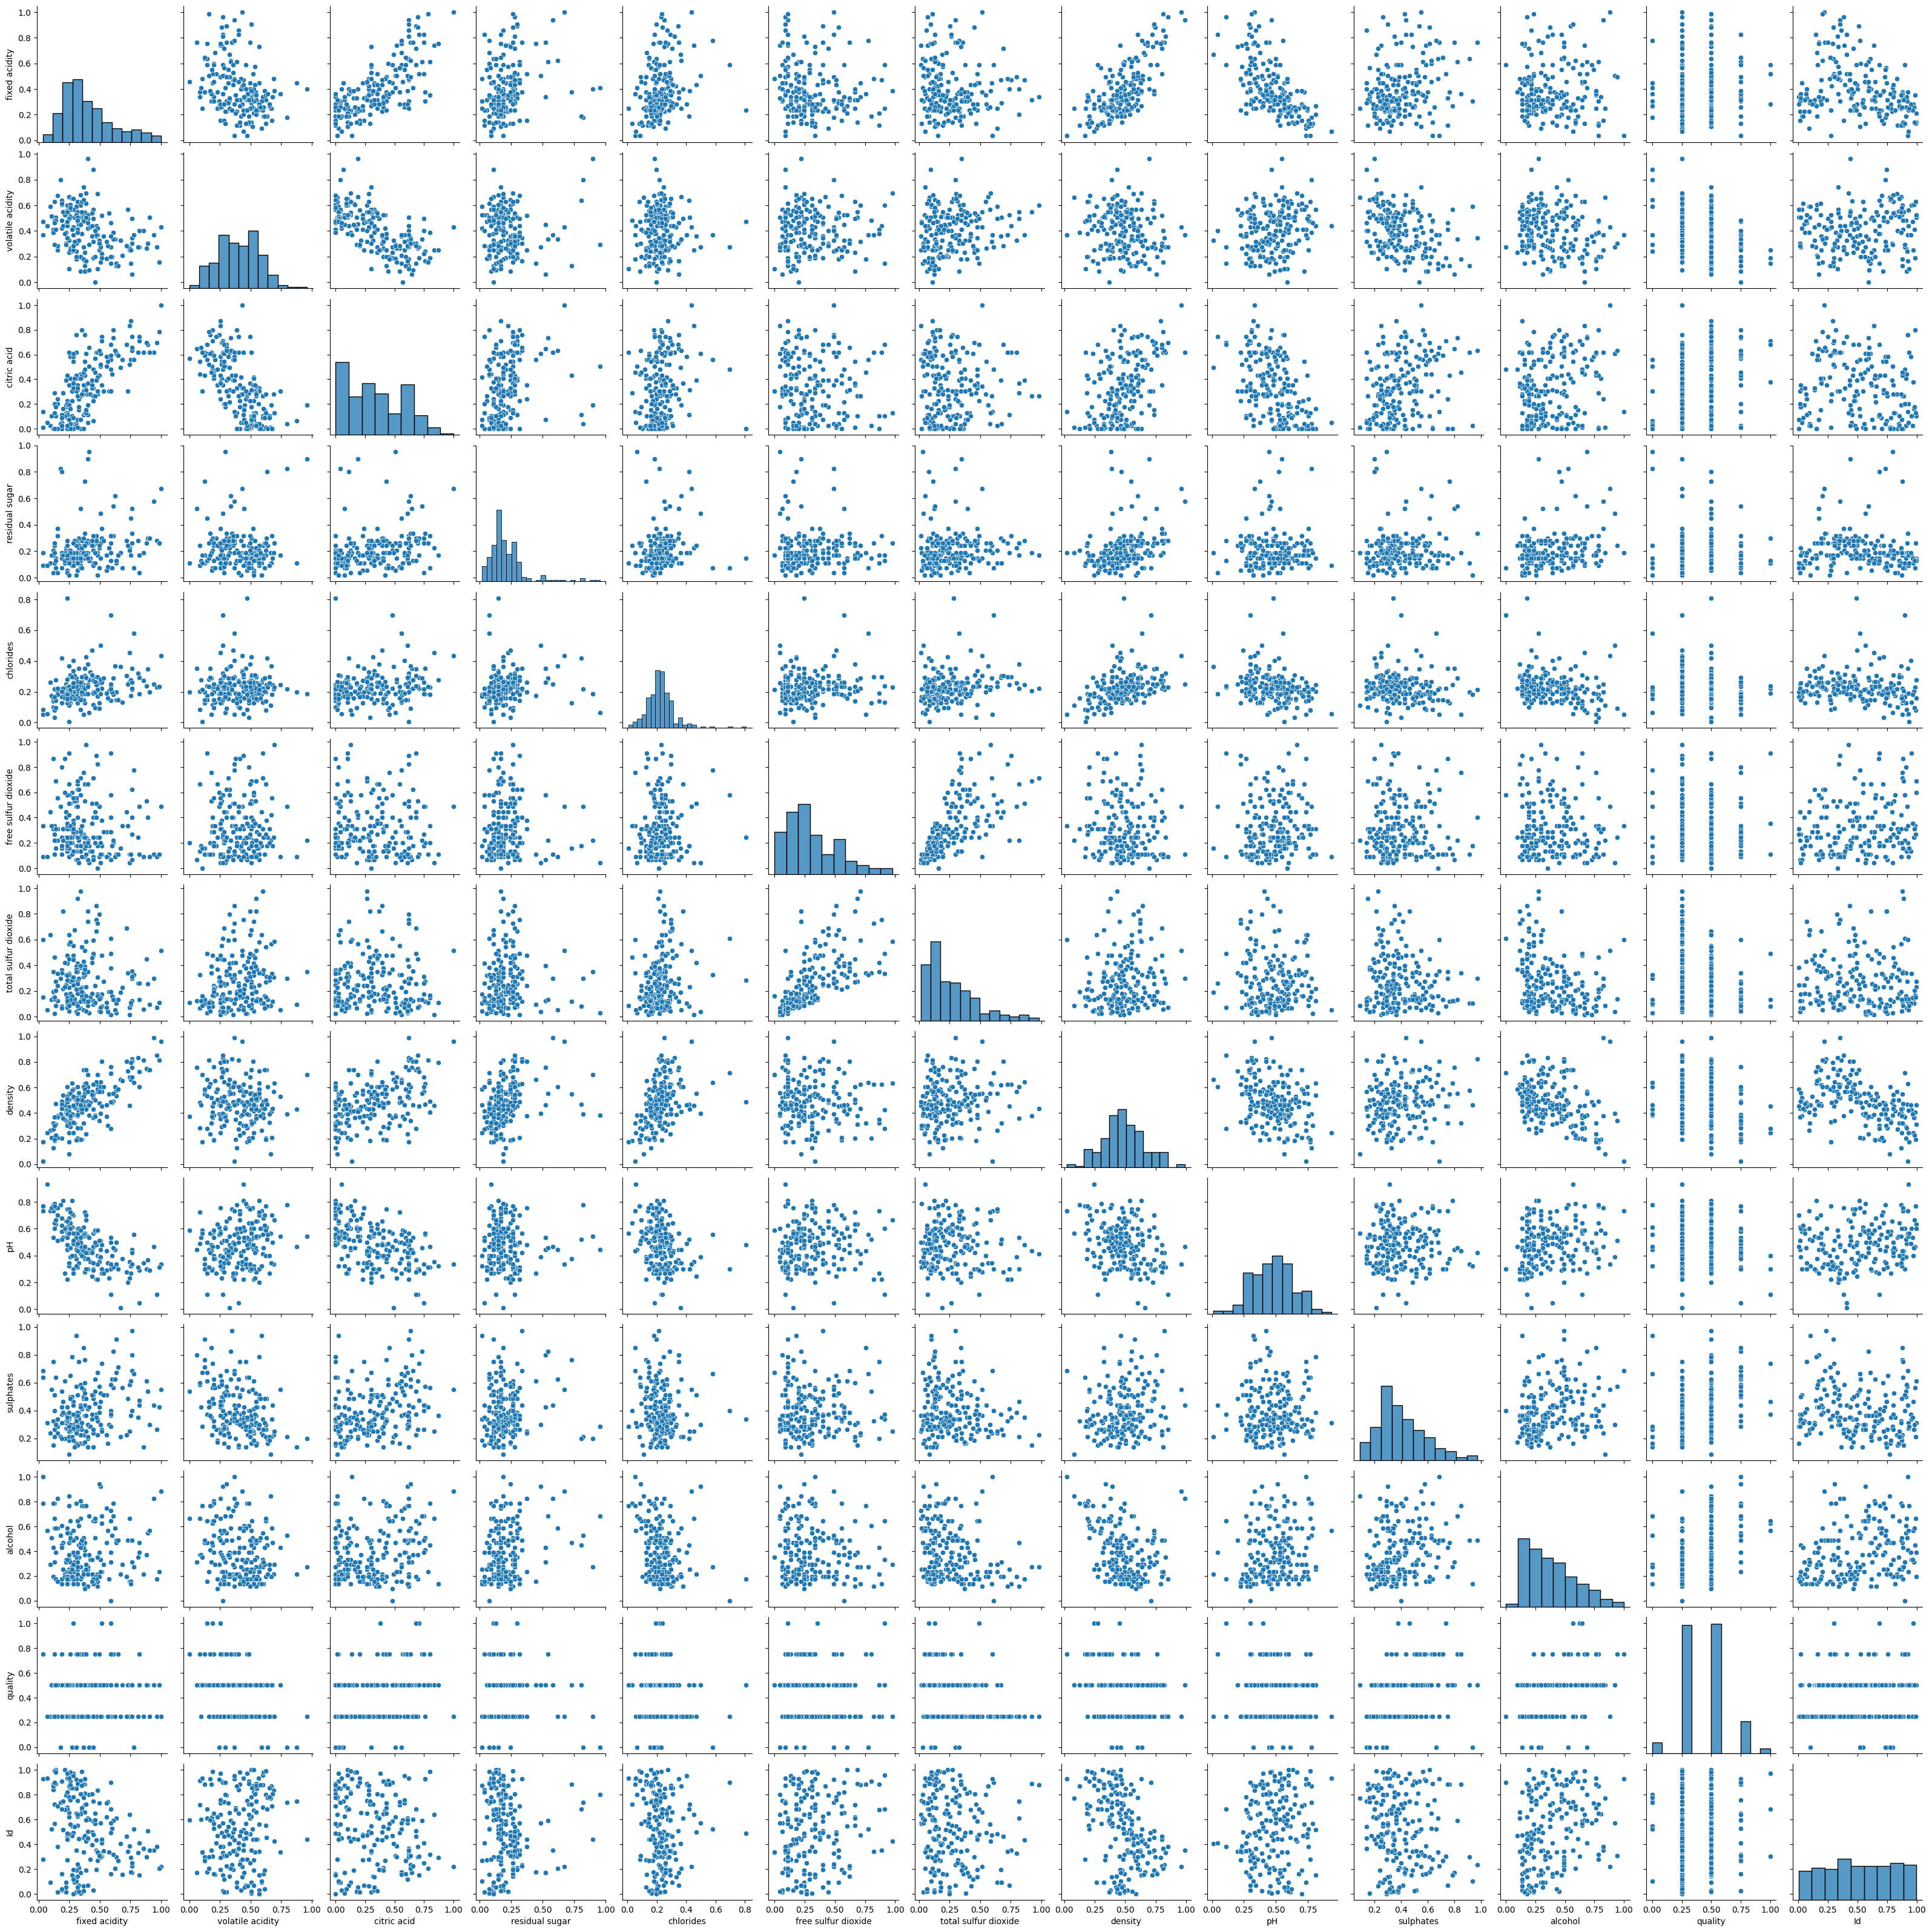

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(scaled_data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap after Preprocessing")
plt.show()

sns.pairplot(scaled_data.sample(200))  # sample for speed
plt.show()